In [58]:
from cpclasses import *

In [2]:
pos = [[0.0, 0.0],[1.0, 0.0],[0.5, 1.0],[1.5, 1.0],[2.0, 0.0],[3.0, 0.0],[2.5, 1.0],
[3.5, 1.0],[0.0, 2.0],[1.0, 2.0],[0.5, 3.0],[1.5, 3.0],[2.0, 2.0],[3.0, 2.0],
[2.5, 3.0],[3.5, 3.0],[4.0, 0.0],[5.0, 0.0],[4.5, 1.0],[5.5, 1.0],[6.0, 0.0],
[7.0, 0.0],[6.5, 1.0],[7.5, 1.0],[4.0, 2.0],[5.0, 2.0],[4.5, 3.0],[5.5, 3.0],
[6.0, 2.0],[7.0, 2.0],[6.5, 3.0],[7.5, 3.0],[0.0, 4.0],[1.0, 4.0],[0.5, 5.0],
[1.5, 5.0],[2.0, 4.0],[3.0, 4.0],[2.5, 5.0],[3.5, 5.0],[0.0, 6.0],[1.0, 6.0],
[0.5, 7.0],[1.5, 7.0],[2.0, 6.0],[3.0, 6.0],[2.5, 7.0],[3.5, 7.0],[4.0, 4.0],
[5.0, 4.0],[4.5, 5.0],[5.5, 5.0],[6.0, 4.0],[7.0, 4.0],[6.5, 5.0],[7.5, 5.0],
[4.0, 6.0],[5.0, 6.0],[4.5, 7.0],[5.5, 7.0],[6.0, 6.0],[7.0, 6.0],[6.5, 7.0],[7.5, 7.0]]

In [59]:
def nvt_thermostat(md):
    
    m = 1  # atomic mass (assuming m = 1 for simplicity)
    velocities = md.get_velocities()

    v = np.random.randn(*velocities.shape)

    v = v - np.mean(v, axis=0)

    v = (3 * velocities.shape[0]*md.kT/np.sum(v**2)) * v


    return v

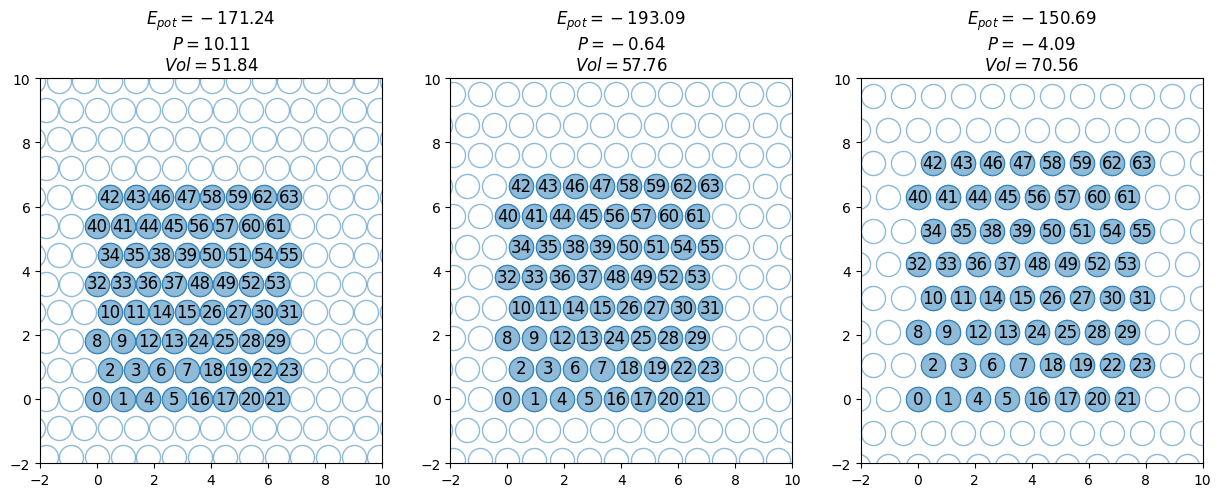

In [40]:
PS1 = PeriodicSystem(PeriodicLennardJonesWithStress(), pos=pos, box=8*np.eye(2))

PS2 = PeriodicSystem(PeriodicLennardJonesWithStress(), pos=pos, box=8*np.eye(2))

PS3 = PeriodicSystem(PeriodicLennardJonesWithStress(), pos=pos, box=8*np.eye(2))


fig, axs = plt.subplots(1,3, figsize=(15,5))

axs[0].set(xlim = (-2, 10), ylim = (-2, 10)) 
scaling1 = 0.90
PS1.box *= scaling1

PS1.set_positions(PS1.get_positions()*scaling1)
PS1.draw_periodic(axs[0], size=300)
PS1.title(axs[0])




scaling2 = 0.95
axs[1].set(xlim = (-2, 10), ylim = (-2, 10))
PS2.box *= scaling2
PS2.set_positions(PS2.get_positions()*scaling2)
PS2.draw_periodic(axs[1], size=300)
PS2.title(axs[1])


axs[2].set(xlim = (-2, 10), ylim = (-2, 10))
scaling3 = 1.05
PS3.box *= scaling3

PS3.set_positions(PS3.get_positions()*scaling3)



PS3.draw_periodic(axs[2], size=300)
PS3.title(axs[2])

save_plot(fig, "Three Volumes.png")

In [35]:
volumes1 = []
pressures1 = []
energies1 = []

volumes3 = []
pressures3 = []
energies3 = []

for _ in range(150):
    volumes1.append(PS1.volume)
    pressures1.append(PS1.pressure())
    energies1.append(PS1.potential_energy)
    barostat(PS1)

    volumes3.append(PS3.volume)
    pressures3.append(PS3.pressure())
    energies3.append(PS3.potential_energy)

    barostat(PS3)




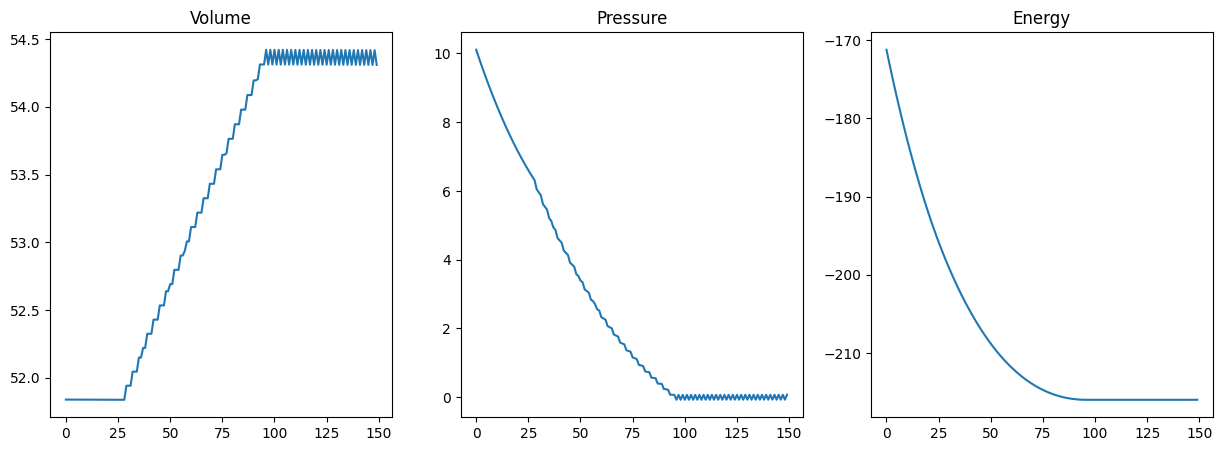

In [38]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

axs[0].plot(volumes1)
axs[0].set_title("Volume")
axs[1].plot(pressures1)
axs[1].set_title("Pressure")
axs[2].plot(energies1)
axs[2].set_title("Energy")

save_plot(fig, "Barostat, high pressure")

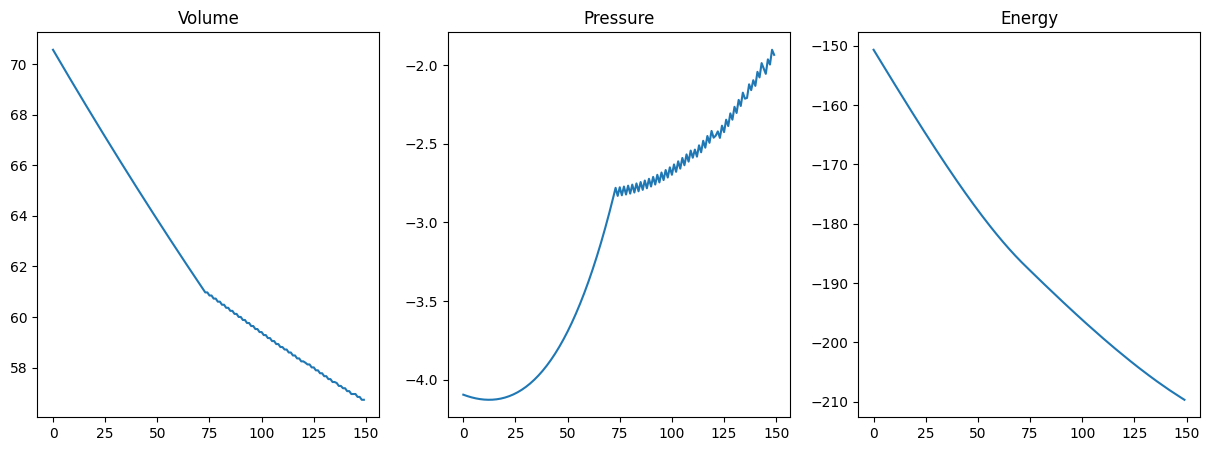

In [39]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

axs[0].plot(volumes3)
axs[0].set_title("Volume")
axs[1].plot(pressures3)
axs[1].set_title("Pressure")
axs[2].plot(energies3)
axs[2].set_title("Energy")

save_plot(fig, "Barostat, low pressure")

In [41]:
pos = [[0.0, 0.0],[1.0, 0.0],[0.5, 1.0],[1.5, 1.0],
[2.0, 0.0],[3.0, 0.0],[2.5, 1.0],[3.5, 1.0],[0.0, 2.0],
[1.0, 2.0],[0.5, 3.0],[1.5, 3.0],[2.0, 2.0],[3.0, 2.0],[2.5, 3.0],[3.5, 3.0]]


In [54]:
PS = PeriodicSystem(PeriodicLennardJonesWithStress(), pos=pos, box=4*np.eye(2))


PS.box *= 0.94
PS.set_positions(PS.get_positions()*0.94)
for _ in range(100):
    barostat(PS)

print(PS.pressure())

0.014994955109848381


In [62]:
N2 = 400

temperatures = [0.4, 0.45, 0.5, 0.55, 0.6, 0.6, 0.55, 0.50, 0.45, 0.4]

data = []

for kT in temperatures:
    PS.kT = kT
    
    volumes = []
    pressures = []
    energies = []

    for _ in range(N2):
        velocity_verlet(PS,N=50, dt=0.01)
        nvt_thermostat(PS)
        barostat(PS)    

        volumes.append(PS.volume)
        pressures.append(PS.pressure())
        energies.append(PS.potential_energy)

    average_volume = np.mean(volumes[-N2//2:])
    average_pressure = np.mean(pressures[-N2//2:])
    average_energy = np.mean(energies[-N2//2:])
    data.append((average_volume, average_pressure, average_energy))

Text(0.5, 1.0, 'Energy')

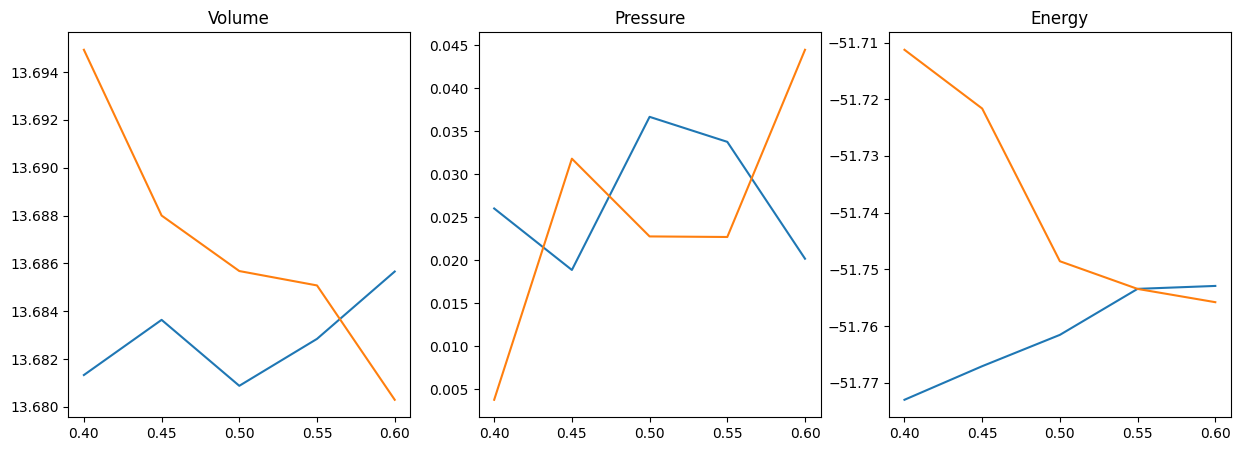

In [67]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

#Plot the volume, pressure and energy as a function of temperature, split up into heating and cooling
heating = data[:5]
cooling = data[5:]

axs[0].plot(temperatures[:5], [d[0] for d in heating], label="Heating")
axs[0].plot(temperatures[5:], [d[0] for d in cooling], label="Cooling")
axs[0].set_title("Volume")

axs[1].plot(temperatures[:5], [d[1] for d in heating], label="Heating")
axs[1].plot(temperatures[5:], [d[1] for d in cooling], label="Cooling")
axs[1].set_title("Pressure")

axs[2].plot(temperatures[:5], [d[2] for d in heating], label="Heating")
axs[2].plot(temperatures[5:], [d[2] for d in cooling], label="Cooling")
axs[2].set_title("Energy")
